## Elower grid error

In [1]:
import matplotlib.pyplot as plt
import numpy as np

(1000,)


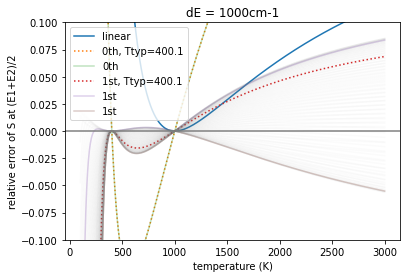

In [23]:
from exojax.utils.constants import hcperk, Tref_original
from exojax.spec.lbderror import single_tilde_line_strength_first
from exojax.spec.lbderror import single_tilde_line_strength_zeroth


Tref = 1000
Ttyp1 = 400.1


def beta(T, Tref):
    return (hcperk * (1. / T - 1. / Tref))


def f(E, T, Tref):
    return np.exp(-beta(T, Tref) * E)

def error_zeroth_eq_analytic(T, Tref, dE):
    x = -beta(T, Tref) * dE / 2.0
    return 0.5 * (np.exp(x) + np.exp(-x))
    

def error_zeroth_analytic(T, Ttyp, Tref, dE):

    #    if Ttyp == Tref:
    #        x = -beta(T, Tref) * dE / 2.0
    #        return 0.5 * (np.exp(x) + np.exp(-x))
    #    else:
    alpha = beta(Ttyp, Tref)
    denom = np.exp(alpha * dE / 2.0) - np.exp(-alpha * dE / 2.0)
    num = (1.0 - np.exp(-alpha * dE / 2.0)) * np.exp(
        beta(T, Tref) * dE / 2.0) - (1.0 - np.exp(alpha * dE / 2.0)) * np.exp(
            -beta(T, Tref) * dE / 2.0)
    return num / denom


def error_first_analytic(T, Ttyp, Tref, dE):
    alpha = beta(Ttyp, Tref)
    facm = np.exp(alpha * dE / 2.0) - np.exp(-alpha * dE / 2.0)
    facp = 2.0 - (np.exp(alpha * dE / 2.0) + np.exp(-alpha * dE / 2.0))
    fac2 = np.exp(beta(T, Tref) * dE / 2.0) - np.exp(-beta(T, Tref) * dE / 2.0)

    return -dE / 2.0 * (alpha - beta(T, Tref)) * fac2 * facp / facm**2


def ds_first(Tarr, Ttyp1, Tref, dE):
    return error_zeroth_analytic(Tarr, Ttyp1, Tref, dE) + error_first_analytic(
        Tarr, Ttyp1, Tref, dE) - 1




#plt.plot(Tarr,x(Tarr,100))
Tarr = np.linspace(100, 3000, 1000)
#Ttyp2=00.0
dE = 1000

### search max deviation in p 
def f(p):
    return single_tilde_line_strength_first(1/Tarr, 1/Ttyp1, 1/Tref, dE, p)

from jax import vmap
import jax.numpy as jnp
ff = vmap(f)

parr=jnp.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
x = jnp.max(ff(parr),axis=0)
xx = jnp.min(ff(parr),axis=0)
print(x.shape)



plt.plot(Tarr, error_zeroth_eq_analytic(Tarr, Tref, dE) - 1, label="linear")
plt.plot(Tarr,
         error_zeroth_analytic(Tarr, Ttyp1, Tref, dE) - 1,
         label="0th, Ttyp=" + str(Ttyp1),
         ls="dotted")
plt.plot(Tarr, single_tilde_line_strength_zeroth(1/Tarr, 1/Ttyp1, 1/Tref, dE, 0.5),alpha=0.3,label="0th")
plt.plot(Tarr,
         ds_first(Tarr, Ttyp1, Tref, dE),
         label="1st, Ttyp=" + str(Ttyp1),
         ls="dotted")
plt.plot(Tarr, x ,alpha=0.3,label="1st")
plt.plot(Tarr, xx ,alpha=0.3,label="1st")

for p in np.linspace(0.0,1.0,100):
    plt.plot(Tarr, single_tilde_line_strength_first(1/Tarr, 1/Ttyp1, 1/Tref, dE, p),alpha=0.03,color="gray")
#    plt.plot(Tarr, single_tilde_line_strength_zeroth(1/Tarr, 1/Ttyp1, 1/Tref, dE, p),alpha=0.1,color="green")


plt.legend()
plt.ylim(-0.1, 0.1)
plt.title("dE = " + str(dE) + "cm-1")
plt.axhline(0.0, color="gray")

#plt.axvline(296.,ymax=0.25,color="red",alpha=0.2)
plt.xlabel("temperature (K)")
plt.ylabel("relative error of S at (E1+E2)/2")
plt.savefig("analytic_est.png")

(1000,)


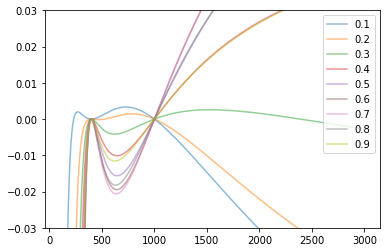

In [3]:
for p in np.linspace(0.1,0.9,9):
    plt.plot(Tarr, single_tilde_line_strength_first(1/Tarr, 1/Ttyp1, 1/Tref, dE, p),alpha=0.5,label=str(round(p,1)))
plt.ylim(-0.03, 0.03)
plt.legend()
plt.show()


In [4]:
N=1000
#Trefarr = np.linspace(100,2000,N)
#Ttyparr = np.linspace(100.1,2000.1,N)
#Tarr = np.linspace(100, 3000, N)
Ttyparr = np.logspace(np.log10(100.1),np.log10(2000.1),N)
Tarr = np.logspace(np.log10(100.), np.log10(3000.), N)

100%|██████████| 1000/1000 [00:39<00:00, 25.03it/s]


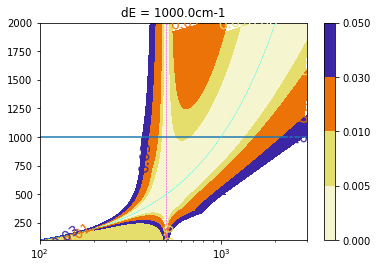

In [30]:
import tqdm
Tref=500.
dE=1000.
arr = []
for ttyp in tqdm.tqdm(Ttyparr):
    #arr.append(ds_first(Tarr, ttyp, Tref, dE))
    #arr.append(single_tilde_line_strength_first(1/Tarr, 1/ttyp, 1/Tref, dE, 0.7))
    def f(p):
        return single_tilde_line_strength_first(1/Tarr, 1/ttyp, 1/Tref, dE, p)
    ff = vmap(f)
    parr=jnp.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    x = jnp.max(np.abs(ff(parr)),axis=0)
    arr.append(x)

arr = np.array(arr).reshape(N, N)
#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Ttyparr, arr, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
plt.axhline(1000)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("dE = "+str(dE)+"cm-1")
plt.colorbar(co)
plt.xscale("log")

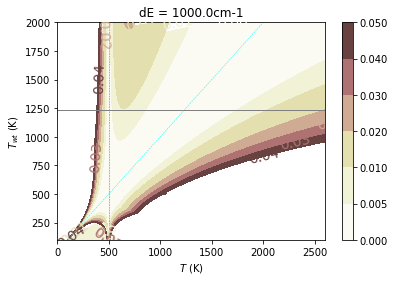

In [42]:
co=plt.contourf(Tarr, Ttyparr, arr, levels=[0.0, 0.005,0.01,0.02,0.03,0.04,0.05],cmap="pink_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
plt.axhline(1230,color="gray",lw=1.0)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("dE = "+str(dE)+"cm-1")
plt.colorbar(co)
plt.xlabel("$T$ (K)")
plt.ylabel("$T_{wt}$ (K)")
#plt.xscale("log")
plt.xlim(0,2600)
plt.show()

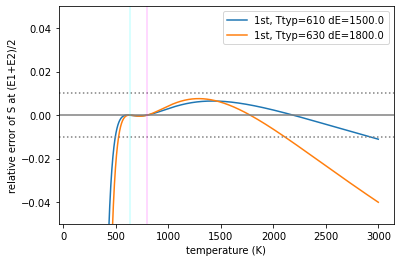

In [166]:
#Tref=800
Ttyp1 = 610
dE1 = 1500.
plt.plot(Tarr,
         ds_first(Tarr, Ttyp1, Tref, dE1),
         label="1st, Ttyp=" + str(Ttyp1) + " dE=" + str(dE1))
Ttyp1 = 630
dE1 = 1800.
plt.plot(Tarr,
         ds_first(Tarr, Ttyp1, Tref, dE1),
         label="1st, Ttyp=" + str(Ttyp1) + " dE=" + str(dE1))

plt.legend()
plt.ylim(-0.05, 0.05)

plt.axhline(0.0, color="gray")
plt.axhline(0.01, color="gray", ls="dotted")
plt.axhline(-0.01, color="gray", ls="dotted")
plt.axvline(Tref, color="magenta", lw=0.3)
plt.axvline(Ttyp1, color="cyan", lw=0.3)
#plt.xscale("log")
#plt.axvline(296.,ymax=0.25,color="red",alpha=0.2)
plt.xlabel("temperature (K)")
plt.ylabel("relative error of S at (E1+E2)/2")
plt.savefig("analytic_est.png")

In [31]:
(1500-400)/(10000/1200*2)

66.0

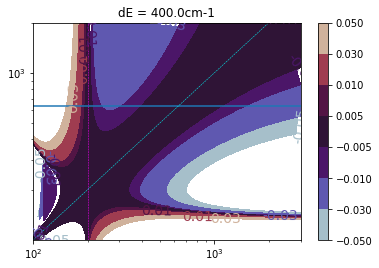

In [172]:
Tref=200.
dE=400.
arr = []
for ttyp in Ttyparr:
    arr.append(ds_first(Tarr, ttyp, Tref, dE))
arr = np.array(arr).reshape(N, N)
#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Ttyparr, arr, levels=[-0.05,-0.03,-0.01,-0.005,0.005,0.01,0.03,0.05],cmap="twilight")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
plt.axhline(630)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("dE = "+str(dE)+"cm-1")
plt.colorbar(co)
plt.xscale("log")
plt.yscale("log")

In [169]:
30000/1800, 30000/1500

(16.666666666666668, 20.0)